# Part II - The Effect of Prosper Rating and HomeOwner Status of a Borrower on the Borrower's Interest Rate and APR

## by Nafisa Opemi Jimoh

## Investigation Overview

> The main goal of this presentation is to show the effect of prosper rating and borrowers home status on the borrower interest rate and APR.

**Key Insights:**

* The higher the prosper rating, the higher the interest rate. Borrowers with the lowest prosper ratings had lower interest rate associated with their loans.

* Not being a home owner as a borrower will have an effect on the APR because borrowers without a home is depicted to have a higher APR on their loans.


## Dataset Overview

> The dataset comprises of 113,937 rows and 81 columns. It contains loan listing from 2005 - 2014. Features include creation date, borrowerAPR, term of payment, borrowerRate, prosper rating and others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
pd.set_option("display.max_columns", None)
df.head(8)

# selecting the features of interest
loan_df = df[['ProsperRating (Alpha)','ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatus', 'Occupation',
                      'BorrowerState', 'ListingCategory (numeric)','IsBorrowerHomeowner']]

# convert ListingCreatingDate to datetime datatype
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])

# filling the missing values in occupation, employment status and borrowers state with unspecified

loan_df['Occupation'] = loan_df['Occupation'].fillna('Unspecified')
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].fillna('Unspecified')
loan_df['BorrowerState'] = loan_df['BorrowerState'].fillna('Unspecified')

# replacing the missing values in BorrowersAPR with the mean
loan_df['BorrowerAPR'] = loan_df['BorrowerAPR'].fillna(loan_df['BorrowerAPR'].mean())

# creating a new column to show only month
loan_df['month'] = pd.DatetimeIndex(loan_df['ListingCreationDate']).month

# creating a new column to show only year
loan_df['year'] = pd.DatetimeIndex(loan_df['ListingCreationDate']).year

In [5]:
# set color for plots except specified otherwise
base_color = sns.color_palette()[0]

In [6]:
# function to show percentage on bar plots
def show_percentage (feature):
    sum_feature_value_count=feature.value_counts().sum()
    feature_value_count=feature.value_counts()
    
    # get the current tick locations and labels
    locs, labels = plt.xticks(rotation=30) 
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        # get the text property for the label to get the correct count
        count = feature_value_count[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/sum_feature_value_count)

        # print the annotation on top of the bar
        plt.text(loc, count+15, pct_string, ha = 'center', color = 'black')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Prosper Rating Distribution

> The prosper rating is the expected level of risk associated with a loan listing. This is assigned to each borrower loan at the time the listing was created. It has 7 grades ranging from lowest to highest: AA, A, B, C, D, E and HR. The rating with the highest number of borrowers on the prosper loan platform is C having 21% while the lowest risk rating takes upto 6.3% of the total number of borrowers on the Prosper Rating platform. 

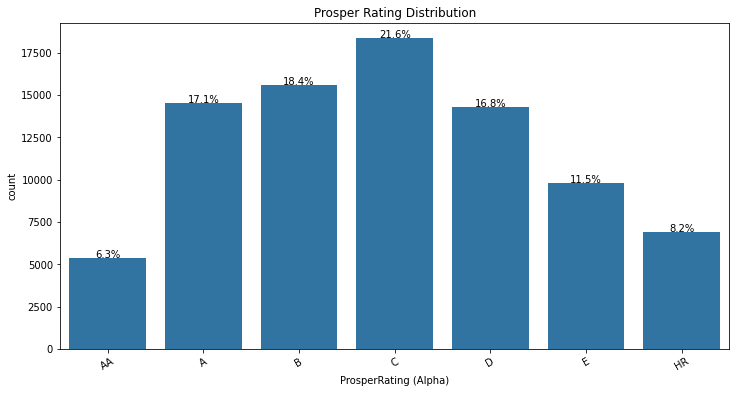

In [7]:
# Visualisation

plt.figure(figsize = [12, 6])
prosper_class = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
prosperRating = pd.api.types.CategoricalDtype(ordered=True, categories=prosper_class)
loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(prosperRating);

# plot chart
sns.countplot(data=loan_df, x=loan_df['ProsperRating (Alpha)'], color=base_color)
plt.xticks(rotation=30); 

# show percentage on the barchart
show_percentage(loan_df['ProsperRating (Alpha)'])
plt.title('Prosper Rating Distribution');

## Borrowers Interest Rate

> A large distribution of borrowers have an interest rate within 0.1 - 0.25, a large peak is seen around 0.33. Few borrowers have an interest rate greater than 0.35.

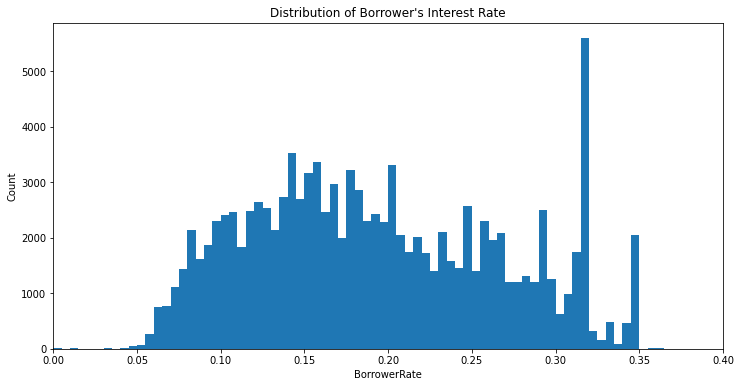

In [8]:
# visualisation

plt.figure(figsize = [12, 6])
bins = np.arange(0, loan_df['BorrowerAPR'].max()+0.1, 0.005)
plt.hist(data = loan_df, x = 'BorrowerRate', bins = bins);
plt.title("Distribution of Borrower's Interest Rate");

plt.xlim((0.00,0.40));
plt.xlabel('BorrowerRate')
plt.ylabel('Count');

## Effect of Prosper Rating on BorrowerRate
> The higher the risk associated with a loan listing, the higher the interest rate. Borrowers given a rating of AA had interest rates lesser than 0.15.

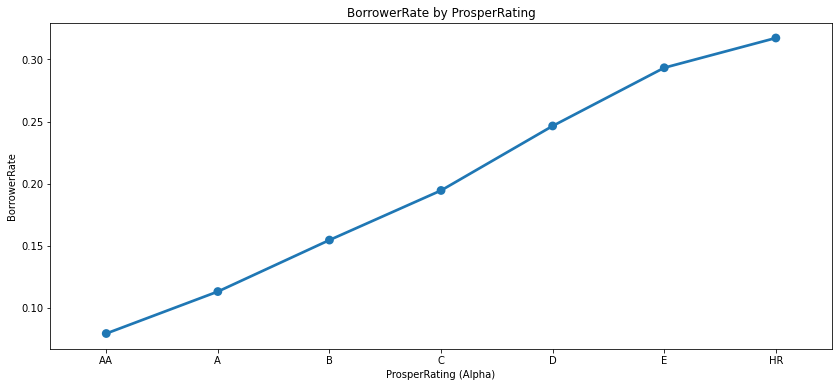

In [9]:
# visualisation

prosper_class = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
prosperRating = pd.api.types.CategoricalDtype(ordered=True, categories=prosper_class)
loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(prosperRating);

plt.figure(figsize = [14, 6])
sns.pointplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color, kind='bar');
plt.title('BorrowerRate by ProsperRating');

## Effect of the Term of Payement and Prosper Rating on the Interest Rate

> Irrespective of the prosper rating, the higher the term of payment, the higher the interest rate. Borrowers who are rated E and choose 60 months (5 years) term of payment will have a higher interest rate to pay than borrowers rated AA with the same term.

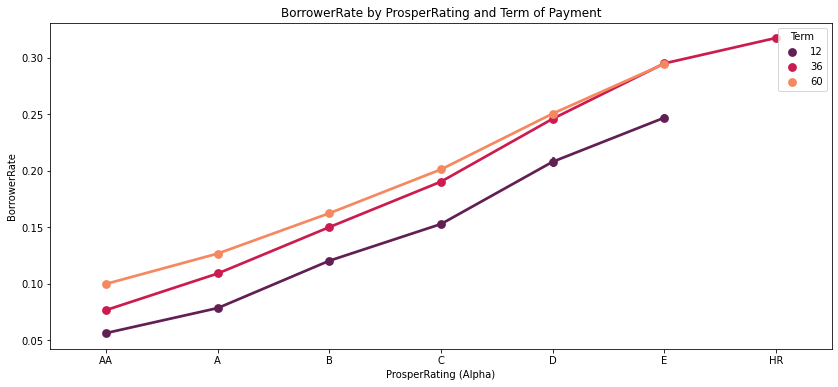

In [16]:
# visualisation

plt.figure(figsize = [14, 6])
sns.pointplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerRate', hue='Term', palette='rocket', kind='bar');
plt.title('BorrowerRate by ProsperRating and Term of Payment');

## HomeOwner Status on the Borrower APR

> Over the years, the borrowers APR for those who aren't home ownners are higher than borrowers who are home owners. Perhaps the houses were seen as a form bond incase the borrower does not meet up with payment.


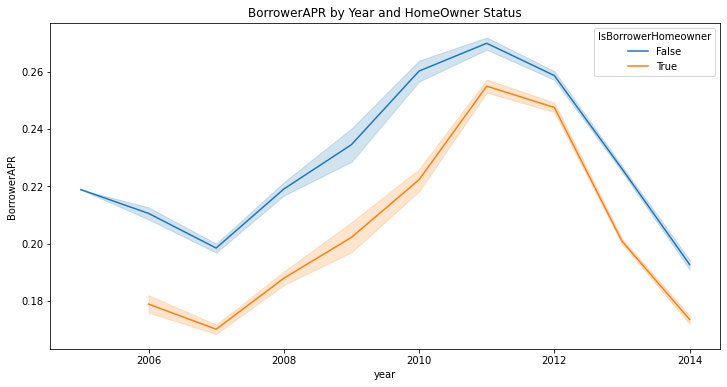

In [17]:
# visualisation

plt.figure(figsize = [12, 6])
sns.lineplot(data=loan_df, x='year', y='BorrowerAPR', hue='IsBorrowerHomeowner');
plt.title('BorrowerAPR by Year and HomeOwner Status');

# Thank you!!

In [21]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 456588 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\HP\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    sel

Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server

Interrupted
